In [25]:
import pandas as pd
import numpy as np
import os
import torch

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import _LRScheduler

In [27]:
X_train = pd.read_csv("../input/career-con-2019/X_train.csv", index_col=['series_id'])
# X_test = pd.read_csv("../input/career-con-2019/X_train.csv", index_col=['series_id'])
# y_train = pd.read_csv("../input/career-con-2019/y_train.csv", index_col=['series_id'])
y_train = pd.read_csv("../input/career-con-2019/y_train.csv")

In [28]:
from torch.utils.data import random_split
group_train_index, group_val_index = random_split(np.unique(y_train['group_id']), [73-20, 20])
group_train_index, group_val_index = group_train_index.indices, group_val_index.indices

In [29]:
train_index = []
for i in range(0, len(group_train_index)):
    train_index.append(list(y_train[y_train['group_id'] == group_train_index[i]]['series_id'].values))
train_index = [item for sublist in train_index for item in sublist]

val_index = []
for i in range(0, len(group_val_index)):
    val_index.append(list(y_train[y_train['group_id'] == group_val_index[i]]['series_id'].values))
val_index = [item for sublist in val_index for item in sublist]
    

In [30]:
print(f"Train Dataset Length: {len(train_index)}")
print(f"Validation Dataset Length: {len(val_index)}")

Train Dataset Length: 2736
Validation Dataset Length: 1074


In [31]:
TRAIN_features = X_train.drop(val_index)
TRAIN_Target = y_train.drop(val_index)
TEST_features = X_train.drop(train_index)
TEST_Target = y_train.drop(train_index)

In [32]:
TRAIN_features['series_id'] = TRAIN_features.index
TRAIN_features.reset_index(drop=True, inplace=True)

TEST_features['series_id'] = TEST_features.index
TEST_features.reset_index(drop=True, inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [33]:
TRAIN_features.head()

,row_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,series_id
0,0_0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,0
1,0_1,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,0
2,0_2,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,0
3,0_3,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,0
4,0_4,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,0


In [34]:
TEST_features.head()

,row_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,series_id
0,10_0,0,0.85025,-0.50554,-0.071490,0.12802,-0.015004,-0.014462,0.054911,-0.074444,2.4283,-7.1784,10
1,10_1,1,0.85021,-0.50559,-0.071647,0.12802,-0.048780,-0.091761,0.046580,0.829070,1.4536,-9.3058,10
2,10_2,2,0.85017,-0.50564,-0.071675,0.12804,-0.023118,-0.019297,0.047038,1.319100,2.4749,-10.2770,10
3,10_3,3,0.85017,-0.50565,-0.071630,0.12807,-0.002120,0.041236,0.014018,0.180900,2.3067,-10.5380,10
4,10_4,4,0.85016,-0.50567,-0.071628,0.12804,0.020479,-0.013007,0.016484,1.513900,2.5563,-9.7400,10


In [35]:
TRAIN_Target.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


In [36]:
TEST_Target.head()

,series_id,group_id,surface
10,10,26,soft_pvc
12,12,25,carpet
13,13,25,carpet
15,15,7,carpet
16,16,7,carpet


In [37]:
# ID_COLS = ['series_id', 'measurement_number', 'row_id']
ID_COLS = ['series_id', 'measurement_number']

# def create_datasets(X_train, y_train,X_test,y_test,y_whole, dropcols=ID_COLS):
#     enc = LabelEncoder()
#     y_whole = enc.fit_transform(y_whole)
#     y_train_enc = enc.transform(y_train)
#     y_test_enc = enc.transform(y_test)
#     X_train = create_grouped_array(X_train)
#     X_test = create_grouped_array(X_test)
#     X_train, X_valid = [torch.tensor(arr, dtype=torch.float32) for arr in (X_train, X_test)]
#     y_train, y_valid = [torch.tensor(arr, dtype=torch.long) for arr in (y_train_enc, y_test_enc)]
#     train_ds = TensorDataset(X_train, y_train)
#     valid_ds = TensorDataset(X_valid, y_valid)
#     return train_ds, valid_ds, enc


def create_grouped_array(data, group_col='series_id', drop_cols=ID_COLS):
    X_grouped = np.row_stack([
        group.drop(columns=drop_cols).values[None]
        for _, group in data.groupby(group_col)])
    return X_grouped


# def create_test_dataset(X, drop_cols=ID_COLS):
#     X_grouped = np.row_stack([
#         group.drop(columns=drop_cols).values[None]
#         for _, group in X.groupby('series_id')])
#     X_grouped = torch.tensor(X_grouped.transpose(0, 2, 1)).float()
#     y_fake = torch.tensor([0] * len(X_grouped)).long()
#     return TensorDataset(X_grouped, y_fake)


def create_loaders(train_ds, valid_ds, bs=512, jobs=0):
    train_dl = DataLoader(train_ds, bs, shuffle=True, num_workers=jobs)
    valid_dl = DataLoader(valid_ds, bs, shuffle=False, num_workers=jobs)
    return train_dl, valid_dl


def accuracy(output, target):
    return (output.argmax(dim=1) == target).float().mean().item()

In [38]:
train_ds, valid_ds, enc = create_datasets(TRAIN_features,TRAIN_Target['surface'],TEST_features,TEST_Target['surface'], y_train['surface'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
for x, y in train_ds:
    print(x)
    print(y)
    break

In [ ]:
for x, y in valid_ds:
    print(x)
    print(y)
    break

In [54]:
class CyclicLR(_LRScheduler):
    
    def __init__(self, optimizer, schedule, last_epoch=-1):
        assert callable(schedule)
        self.schedule = schedule
        super().__init__(optimizer, last_epoch)

    def get_lr(self):
        return [self.schedule(self.last_epoch, lr) for lr in self.base_lrs]

In [55]:
def cosine(t_max, eta_min=0):
    
    def scheduler(epoch, base_lr):
        t = epoch % t_max
        return eta_min + (base_lr - eta_min)*(1 + np.cos(np.pi*t/t_max))/2
    
    return scheduler

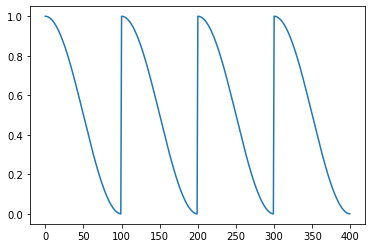

In [56]:
n = 100
sched = cosine(n)
lrs = [sched(t, 1) for t in range(n * 4)]
plt.plot(lrs)

In [52]:
class LSTMClassifier(nn.Module):
    """Very simple implementation of LSTM-based time-series classifier."""
    
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.rnn = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.batch_size = None
        self.hidden = None
    
    def forward(self, x):
        h0, c0 = self.init_hidden(x)
        out, (hn, cn) = self.rnn(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out
    
    def init_hidden(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)
        return [t.cuda() for t in (h0, c0)]

In [46]:
from multiprocessing import cpu_count
# bs = 128
# print(f'Creating data loaders with batch size: {bs}')
# trn_dl, val_dl = create_loaders(train_ds, valid_ds, bs, jobs=cpu_count())

In [47]:
seed = 1
np.random.seed(seed)
torch.cuda.set_device(0) 

In [48]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [39]:
ID_COLS = ['series_id', 'measurement_number']

x_cols = {
    'series_id': np.uint32,
    'measurement_number': np.uint32,
    'orientation_X': np.float32,
    'orientation_Y': np.float32,
    'orientation_Z': np.float32,
    'orientation_W': np.float32,
    'angular_velocity_X': np.float32,
    'angular_velocity_Y': np.float32,
    'angular_velocity_Z': np.float32,
    'linear_acceleration_X': np.float32,
    'linear_acceleration_Y': np.float32,
    'linear_acceleration_Z': np.float32
}

y_cols = {
    'series_id': np.uint32,
    'group_id': np.uint32,
    'surface': str
}

x_trn = pd.read_csv("../input/career-con-2019/X_train.csv", usecols=x_cols.keys(), dtype=x_cols)
# x_tst = pd.read_csv(TEST, usecols=x_cols.keys(), dtype=x_cols)
y_trn = pd.read_csv("../input/career-con-2019/y_train.csv", usecols=y_cols.keys(), dtype=y_cols)

def create_datasets(X, y, test_size=0.2, dropcols=ID_COLS, time_dim_first=False):
    enc = LabelEncoder()
    y_enc = enc.fit_transform(y)
    X_grouped = create_grouped_array(X)
    if time_dim_first:
        X_grouped = X_grouped.transpose(0, 2, 1)
    X_train, X_valid, y_train, y_valid = train_test_split(X_grouped, y_enc, test_size=0.1)
    X_train, X_valid = [torch.tensor(arr, dtype=torch.float32) for arr in (X_train, X_valid)]
    y_train, y_valid = [torch.tensor(arr, dtype=torch.long) for arr in (y_train, y_valid)]
    print(X_train.shape)
    train_ds = TensorDataset(X_train, y_train)
    valid_ds = TensorDataset(X_valid, y_valid)
    return train_ds, valid_ds, enc

In [43]:
print('Preparing datasets')
trn_ds, val_ds, enc = create_datasets(x_trn, y_trn['surface'], dropcols=ID_COLS)

Preparing datasets
torch.Size([3429, 128, 10])


In [50]:
bs = 128
print(f'Creating data loaders with batch size: {bs}')
trn_dl, val_dl = create_loaders(trn_ds, val_ds, bs, jobs=cpu_count())

Creating data loaders with batch size: 128


In [59]:
input_dim = 10    
hidden_dim = 256
layer_dim = 3
output_dim = 9
seq_dim = 128

lr = 0.0005
n_epochs = 300
iterations_per_epoch = len(trn_dl)
best_acc = 0
patience, trials = 100, 0

model = LSTMClassifier(input_dim, hidden_dim, layer_dim, output_dim)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=lr)
sched = CyclicLR(opt, cosine(t_max=iterations_per_epoch * 2, eta_min=lr/100))


loss_history = {
        "train": [],
        "val": []
    }
    
metric_history = {
    "train": [],
    "val": []
}
    

print('Start model training')

for epoch in range(1, n_epochs + 1):
    correct, total = 0, 0
    for i, (x_batch, y_batch) in enumerate(trn_dl):
        model.train()
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        sched.step()
        opt.zero_grad()
        out = model(x_batch)
        loss = criterion(out, y_batch)
        loss.backward()
        opt.step()
        
        preds = F.log_softmax(out, dim=1).argmax(dim=1)
        total += y_batch.size(0)
        correct += (preds == y_batch).sum().item()
    acc = correct / total
    
    metric_history["train"].append(acc)
    loss_history["train"].append(loss.item())
    model.eval()
    correct, total = 0, 0
    for x_val, y_val in val_dl:
        x_val, y_val = [t.to(device) for t in (x_val, y_val)]
        out = model(x_val)
        loss_val = criterion(out, y_val)
        preds = F.log_softmax(out, dim=1).argmax(dim=1)
        total += y_val.size(0)
        correct += (preds == y_val).sum().item()
    
    acc = correct / total
    loss_history["val"].append(loss_val.item())
    metric_history["val"].append(acc)

    if epoch % 5 == 0:
        print(f'Epoch: {epoch:3d}. Loss: {loss.item():.4f}. Acc.: {acc:2.2%}')

    if acc > best_acc:
        trials = 0
        best_acc = acc
        torch.save(model.state_dict(), 'best.pth')
        print(f'Epoch {epoch} best model saved with accuracy: {best_acc:2.2%}')
    else:
        trials += 1
        if trials >= patience:
            print(f'Early stopping on epoch {epoch}')
            break

Start model training
Epoch 1 best model saved with accuracy: 22.57%
Epoch 4 best model saved with accuracy: 27.82%
Epoch:   5. Loss: 1.7204. Acc.: 36.22%
Epoch 5 best model saved with accuracy: 36.22%
Epoch 6 best model saved with accuracy: 38.06%
Epoch 8 best model saved with accuracy: 39.90%
Epoch:  10. Loss: 1.4972. Acc.: 35.70%
Epoch 13 best model saved with accuracy: 45.67%
Epoch:  15. Loss: 1.5043. Acc.: 42.26%
Epoch 18 best model saved with accuracy: 46.19%
Epoch 19 best model saved with accuracy: 46.72%
Epoch:  20. Loss: 1.4451. Acc.: 42.26%
Epoch 22 best model saved with accuracy: 47.51%
Epoch 23 best model saved with accuracy: 48.56%
Epoch:  25. Loss: 1.4396. Acc.: 46.19%
Epoch 26 best model saved with accuracy: 50.39%
Epoch 27 best model saved with accuracy: 53.28%
Epoch:  30. Loss: 1.3043. Acc.: 37.27%
Epoch 34 best model saved with accuracy: 55.64%
Epoch:  35. Loss: 1.3607. Acc.: 49.34%
Epoch:  40. Loss: 1.1326. Acc.: 52.23%
Epoch 42 best model saved with accuracy: 56.69%


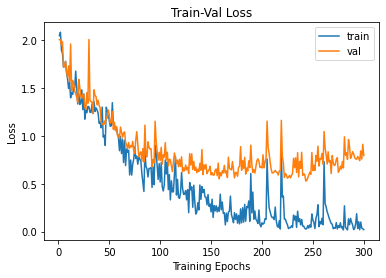

In [60]:
# num_epochs=params_train["num_epochs"]
plt.title("Train-Val Loss")
plt.plot(range(1,len(loss_history["train"])+1),loss_history["train"],label="train")
plt.plot(range(1,len(loss_history["train"])+1),loss_history["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

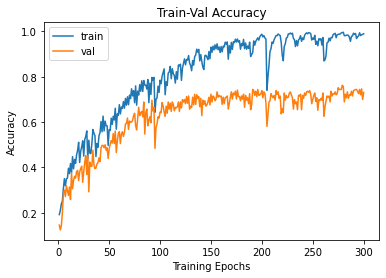

In [61]:
plt.title("Train-Val Accuracy")
plt.plot(range(1,len(metric_history["val"])+1),metric_history["train"],label="train")
plt.plot(range(1,len(metric_history["val"])+1),np.array(metric_history["val"])-.08,label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

In [62]:
np.max(np.array(metric_history["val"])-.08) * 100

76.25196850393701